In [4]:
install.packages("lmerTest")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [5]:
suppressPackageStartupMessages(library(readxl))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(pheatmap))
suppressPackageStartupMessages(library(stringr))
library(hise)
library(plyr)
library(purrr)
library(vegan)
#library(arrow)
library(parallel)
library(ComplexHeatmap)
library(ggsci)
library(tidyverse)
library(rstatix)
library(ggpubr)

In [6]:
library("ggpubr")
#library("see")
library("tidyverse")
library(parallel)
library(lmerTest)
library(lme4)
suppressPackageStartupMessages(library(performance))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(pheatmap))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(plyr))
suppressPackageStartupMessages(library(ggrepel))
library(RColorBrewer)
library(viridis)

Loading required package: lme4

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step




ERROR: Error in library(performance): there is no package called ‘performance’


# Four group comparison

In [7]:
female_br1<-read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/Figure_Notebooks/Intermediate_files/Olink_analysis_DIHA/CSVs/Olink_Female_BR1_npx.csv")

In [10]:
female_br2<-read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/Figure_Notebooks/Intermediate_files/Olink_analysis_DIHA/CSVs/Olink_Female_BR2_npx.csv")

In [11]:
male_br1<-read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/Figure_Notebooks/Intermediate_files/Olink_analysis_DIHA/CSVs/Olink_Male_BR1_npx.csv")

In [12]:
male_br2<-read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/Figure_Notebooks/Intermediate_files/Olink_analysis_DIHA/CSVs/Olink_Male_BR2_npx.csv")

In [13]:
# Combine data frames vertically
combined_df <- rbind(female_br1, female_br2, male_br1, male_br2 )

In [14]:
combined_df %>% head()

,X.x,sample.sampleKitGuid,NPX_bridged,Assay,batch,X.y,Unnamed..0,lastUpdated,sample.id,sample.bridgingControl,⋯,subject.subjectGuid,cohort.cohortGuid,sample.diseaseStatesRecordedAtVisit,pbmc_sample_id,subject.covidVaxDose1.daysSinceFirstVisit,subject.covidVaxDose2.daysSinceFirstVisit,Covid_exclusion,subjectGuid,CMV,facet
,<int>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<lgl>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,867287,KT00532,0.40485,NPDC1,Batch2_Bridged,226,227,2024-05-10T17:12:44.959Z,daa136f9-4e2f-42d3-a5b3-8d0b5d859aea,False,⋯,BR1048,BR1,NA,PB00532-01,150,181,no,BR1048,Positive,Female_BR1
2,873271,KT00532,-0.54620,GDF15,Batch2_Bridged,226,227,2024-05-10T17:12:44.959Z,daa136f9-4e2f-42d3-a5b3-8d0b5d859aea,False,⋯,BR1048,BR1,NA,PB00532-01,150,181,no,BR1048,Positive,Female_BR1
3,875647,KT00532,0.58060,DPT,Batch2_Bridged,226,227,2024-05-10T17:12:44.959Z,daa136f9-4e2f-42d3-a5b3-8d0b5d859aea,False,⋯,BR1048,BR1,NA,PB00532-01,150,181,no,BR1048,Positive,Female_BR1
4,875735,KT00532,-0.40900,CRTAC1,Batch2_Bridged,226,227,2024-05-10T17:12:44.959Z,daa136f9-4e2f-42d3-a5b3-8d0b5d859aea,False,⋯,BR1048,BR1,NA,PB00532-01,150,181,no,BR1048,Positive,Female_BR1
5,881367,KT00532,-0.46540,MCAM,Batch2_Bridged,226,227,2024-05-10T17:12:44.959Z,daa136f9-4e2f-42d3-a5b3-8d0b5d859aea,False,⋯,BR1048,BR1,NA,PB00532-01,150,181,no,BR1048,Positive,Female_BR1
6,886999,KT00532,0.21315,ANGPTL3,Batch2_Bridged,226,227,2024-05-10T17:12:44.959Z,daa136f9-4e2f-42d3-a5b3-8d0b5d859aea,False,⋯,BR1048,BR1,NA,PB00532-01,150,181,no,BR1048,Positive,Female_BR1


In [25]:
length(unique(female_br2$sample.sampleKitGuid))

[1] 25

In [26]:
length(unique(female_br1$sample.sampleKitGuid))

[1] 26

In [27]:
length(unique(male_br1$sample.sampleKitGuid))

[1] 21

In [28]:
length(unique(male_br2$sample.sampleKitGuid))

[1] 20

In [29]:
25+26+21+20

[1] 92

In [24]:
length(combined_df$facet== "Female_BR1")

[1] 2852

In [15]:
#Loop to create plots


# Define the list of genes
gene_list <- c('CGA', 'NEFL', 'CDCP1', 'ANGPTL3', 'TFF1', 'HSPB6', 'CRTAC1','F3','MCAM','DTX3','NPDC1','TNFRSF1A','SCARB2','CD302',
            'PHOSPHO1','JAM2','ITGAV','CTSV','PAEP', 'MLN','CXCL17','IGFBP4','GDF15','WFDC2','FLT3LG','DPT','RET', 'TNF', 'IL1B', 'IL1RN', 'CCL5')

# comparisons
my_comparisons <- list(c("Female_BR1", "Female_BR2"), c("Male_BR1", "Male_BR2"), c("Female_BR1", "Male_BR1"), c("Female_BR2", "Male_BR2"))

# Iterate through the list of genes
for (gene in gene_list) {
    
    protein_df <- combined_df %>% filter(combined_df$Assay == gene)
  
    # Perform statistical test for the current gene
    stat_test <- wilcox_test(NPX_bridged ~ facet, data = protein_df, comparisons = my_comparisons, paired= FALSE)%>% 
   adjust_pvalue(method = 'BH') %>% 
   add_xy_position(x = "facet", dodge = 0.8)

  # Define the output file path
  outfile <- paste("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/Figure_Notebooks/Intermediate_files/Olink_analysis_DIHA/Plots/version1_plots/Olink_NPX_Padj_", gene, ".pdf", sep="")
  
  # Create the plot for the current gene
  p3 <- ggplot(protein_df, aes(x = facet, y = NPX_bridged, color = subject.biologicalSex)) +
    geom_violin(width = 0.7) +  # Adjust width as needed
    geom_boxplot(width = 0.5, outlier.shape = NA) +  # Nudge boxplots slightly for better visualization
    geom_jitter(width = 0.1) +
    ylab('NPX') + 
    xlab('Groups') +
    scale_color_manual(values = c("#9970ab", "#5aae61")) +
    theme(axis.text.x = element_text(size = 14, angle = 90),     
          axis.text.y = element_text(size = 14),     
          axis.title = element_text(size = 14),
          panel.background = element_rect(fill = "white"),
          axis.line = element_line(color = "black"),
          panel.grid.minor = element_blank(),
          legend.position = "top",
          plot.title = element_text(hjust = 0.5, size = 16, face = "bold")
    ) +
    stat_pvalue_manual(stat_test, label ="p_value= {p},\np_adj= {p.adj.signif}", tip.length = 0) +
    ggtitle(gene)
  
  # Save the plot to a PDF file
  pdf(file = outfile, width = 7, height = 13)
  print(p3)
  dev.off()
}


## stat_test table output

In [17]:
# Define the list of genes
gene_list <- c('CGA', 'NEFL', 'CDCP1', 'ANGPTL3', 'TFF1', 'HSPB6', 'CRTAC1','F3','MCAM','DTX3','NPDC1','TNFRSF1A','SCARB2','CD302',
            'PHOSPHO1','JAM2','ITGAV','CTSV','PAEP', 'MLN','CXCL17','IGFBP4','GDF15','WFDC2','FLT3LG','DPT','RET', 'TNF', 'IL1B', 'IL1RN', 'CCL5')
# comparisons
my_comparisons <- list(c("Female_BR1", "Female_BR2"), c("Male_BR1", "Male_BR2"), c("Female_BR1", "Male_BR1"), c("Female_BR2", "Male_BR2"))


for (gene in gene_list) {
  
    protein_df <- combined_df %>% filter(combined_df$Assay == gene)
    
    # Perform statistical test for the current gene
   stat_test <- wilcox_test(NPX_bridged ~ facet, data = protein_df, comparisons = my_comparisons, paired= FALSE)%>% 
   adjust_pvalue(method = 'BH') 
  
  # Extract the data frame from the stat_test list
  #stat_df <- data.frame(stat_test[[9]])
  
  # Define the output file path for the CSV
  outfile_csv <- paste("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/Figure_Notebooks/Intermediate_files/Olink_analysis_DIHA/stat_table/version1_stat_table/Olink_stat_test_", gene, ".csv", sep="")
  
  # Write the data frame to a CSV file
  write.csv(stat_test, outfile_csv, row.names = FALSE)
}

# Volcano plot (using Q's generated differentials)

In [3]:
male_olink <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/Olink_analysis/CSVs/res_all_age_Male.csv")
head(male_olink)

,X,Estimate,Std..Error,t.value,Pr...t..,factor,Assay,Log2FC_Age,diff,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,cohort.cohortGuidBR2,-0.31404684,0.31248657,-1.0049931,0.32125712,Age,GYS1,-0.16027669,-0.317386667,1
2,cohort.cohortGuidBR21,0.10445057,0.10524958,0.9924085,0.32727587,Age,THPO,0.18672020,0.103853333,1
3,cohort.cohortGuidBR22,0.13781379,0.11562005,1.1919541,0.24067019,Age,CLEC1A,0.21617586,0.140088095,1
4,cohort.cohortGuidBR23,-0.00895431,0.08605757,-0.1040502,0.91767673,Age,ENTPD6,-0.02460835,-0.009962381,1
5,cohort.cohortGuidBR24,0.18216006,0.17814645,1.0225298,0.31299605,Age,CEACAM8,0.64968713,0.178448095,1
6,cohort.cohortGuidBR25,0.28795431,0.15958606,1.8043826,0.07910181,Age,S100P,0.95840216,0.287649286,1


In [4]:
female_olink <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/Olink_analysis/CSVs/res_all_age_Female.csv")
head(female_olink)

,X,Estimate,Std..Error,t.value,Pr...t..,factor,Assay,Log2FC_Age,diff,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,cohort.cohortGuidBR2,0.014084760,0.32010931,0.04399985,9.650871e-01,Age,GYS1,0.00997620,0.018938538,1.00000000
2,cohort.cohortGuidBR21,0.376308726,0.08035168,4.68327128,2.349236e-05,Age,THPO,0.76754320,0.389521308,0.03371154
3,cohort.cohortGuidBR22,0.149121132,0.10279043,1.45072969,1.533592e-01,Age,CLEC1A,0.27795947,0.150093769,1.00000000
4,cohort.cohortGuidBR23,0.063681226,0.06761780,0.94178194,3.510202e-01,Age,ENTPD6,0.15037582,0.058399538,1.00000000
5,cohort.cohortGuidBR24,-0.007663344,0.19752234,-0.03879735,9.692129e-01,Age,CEACAM8,-0.03573175,-0.008413308,1.00000000
6,cohort.cohortGuidBR25,0.305021773,0.14688491,2.07660387,4.321507e-02,Age,S100P,NA,0.338451538,1.00000000


## Male olink volcano plots

In [40]:
data <- male_olink%>% mutate(Expression = case_when(diff >=0.1 & padj <= 0.05 ~ "Up-regulated-BR2",
                                                     diff <= -0.1 & padj <= 0.05 ~ "Down-regulated-BR2",
                                                     TRUE ~ "Unchanged"))
data
unique(data$Expression)

X,Estimate,Std..Error,t.value,Pr...t..,factor,Assay,Log2FC_Age,diff,padj,Expression
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
cohort.cohortGuidBR2,-0.314046839,0.31248657,-1.004993091,0.321257122,Age,GYS1,-0.160276691,-0.317386667,1.0000000,Unchanged
cohort.cohortGuidBR21,0.104450575,0.10524958,0.992408518,0.327275868,Age,THPO,0.186720204,0.103853333,1.0000000,Unchanged
cohort.cohortGuidBR22,0.137813793,0.11562005,1.191954124,0.240670187,Age,CLEC1A,0.216175859,0.140088095,1.0000000,Unchanged
cohort.cohortGuidBR23,-0.008954310,0.08605757,-0.104050230,0.917676726,Age,ENTPD6,-0.024608346,-0.009962381,1.0000000,Unchanged
cohort.cohortGuidBR24,0.182160057,0.17814645,1.022529795,0.312996050,Age,CEACAM8,0.649687131,0.178448095,1.0000000,Unchanged
cohort.cohortGuidBR25,0.287954310,0.15958606,1.804382608,0.079101812,Age,S100P,0.958402164,0.287649286,1.0000000,Unchanged
cohort.cohortGuidBR26,0.012015805,0.12023199,0.099938502,0.920918548,Age,ENTPD5,0.034166579,0.010353333,1.0000000,Unchanged
cohort.cohortGuidBR27,0.018852730,0.12329518,0.152907279,0.879280462,Age,ACE2,0.210830263,0.013001190,1.0000000,Unchanged
cohort.cohortGuidBR28,0.140673420,0.09421079,1.493177345,0.143648038,Age,DCN,1.479951366,0.141149048,1.0000000,Unchanged


[1] "Unchanged"          "Up-regulated-BR2"   "Down-regulated-BR2"

In [41]:
top <- 30
top_genes <- bind_rows(
  data %>% 
    filter(Expression == 'Up-regulated-BR2') %>% 
    arrange(padj, desc(abs(diff))) %>% 
    head(top),
  data %>% 
    filter(Expression == 'Down-regulated-BR2') %>% 
    arrange(padj, desc(abs(diff))) %>% 
    head(top))

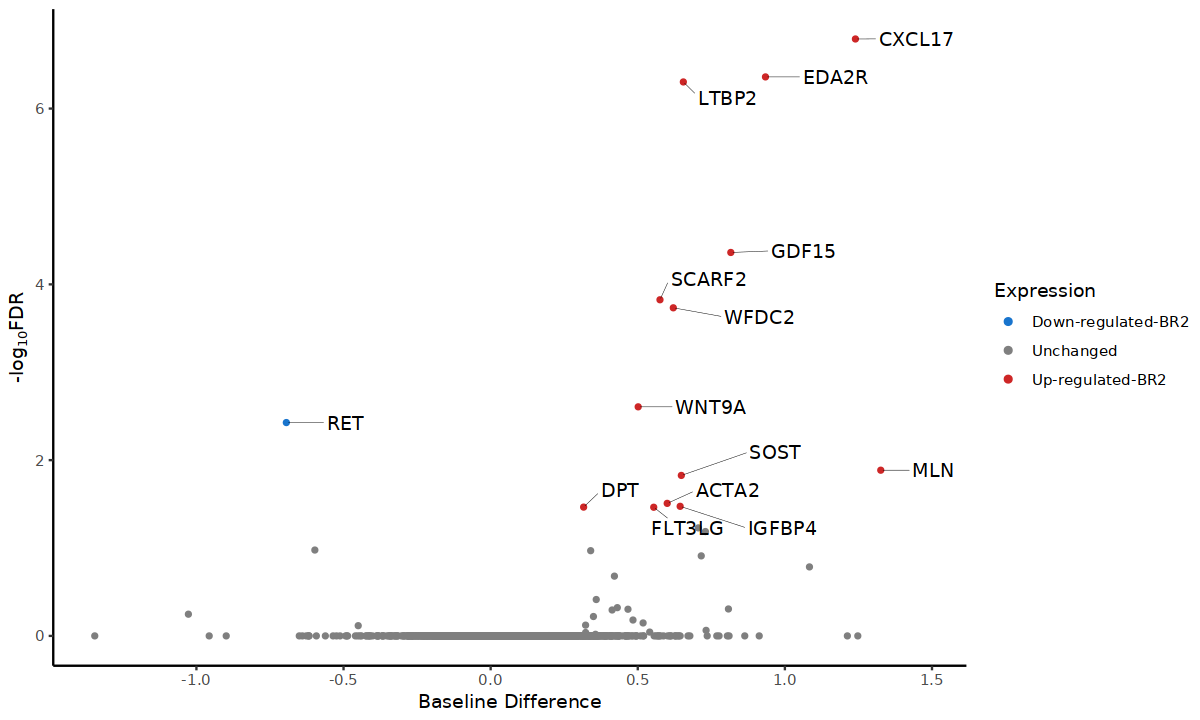

In [42]:
options(repr.plot.width = 10, repr.plot.height = 6)

ggplot(data, aes(diff, -log(padj,10))) +
  geom_point(aes(color = Expression), size = 1) +
  xlab(expression("Baseline Difference")) + 
  ylab(expression("-log"[10]*"FDR")) +
  scale_color_manual(values = c("Down-regulated-BR2"="dodgerblue3", "Unchanged"="gray50", "Up-regulated-BR2"="firebrick3")) +
  guides(colour = guide_legend(override.aes = list(size=1.5))) +
  geom_text_repel(data = top_genes,box.padding = 0.5,force= 0.5,max.overlaps=50,
    nudge_x           = 0.15,
    hjust             = 0.1,
    segment.size      = 0.1,
                   mapping = aes(diff, -log(padj,10), label = Assay),
                   size = 4)+theme_classic()


## Female olink volcano plots

In [36]:
data <- female_olink%>% mutate(Expression = case_when(diff >=0.1 & padj <= 0.05 ~ "Up-regulated-BR2",
                                                     diff <= -0.1 & padj <= 0.05 ~ "Down-regulated-BR2",
                                                     TRUE ~ "Unchanged"))
data
unique(data$Expression)

X,Estimate,Std..Error,t.value,Pr...t..,factor,Assay,Log2FC_Age,diff,padj,Expression
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
cohort.cohortGuidBR2,0.014084760,0.32010931,0.04399985,9.650871e-01,Age,GYS1,0.00997620,0.018938538,1.00000000,Unchanged
cohort.cohortGuidBR21,0.376308726,0.08035168,4.68327128,2.349236e-05,Age,THPO,0.76754320,0.389521308,0.03371154,Up-regulated-BR2
cohort.cohortGuidBR22,0.149121132,0.10279043,1.45072969,1.533592e-01,Age,CLEC1A,0.27795947,0.150093769,1.00000000,Unchanged
cohort.cohortGuidBR23,0.063681226,0.06761780,0.94178194,3.510202e-01,Age,ENTPD6,0.15037582,0.058399538,1.00000000,Unchanged
cohort.cohortGuidBR24,-0.007663344,0.19752234,-0.03879735,9.692129e-01,Age,CEACAM8,-0.03573175,-0.008413308,1.00000000,Unchanged
cohort.cohortGuidBR25,0.305021773,0.14688491,2.07660387,4.321507e-02,Age,S100P,NA,0.338451538,1.00000000,Unchanged
cohort.cohortGuidBR26,0.168489067,0.09392083,1.79394781,7.912163e-02,Age,ENTPD5,0.49562989,0.162497923,1.00000000,Unchanged
cohort.cohortGuidBR27,0.115010325,0.11539259,0.99668724,3.239145e-01,Age,ACE2,-0.41812922,0.114802769,1.00000000,Unchanged
cohort.cohortGuidBR28,0.369476278,0.08413225,4.39161306,6.172413e-05,Age,DCN,NA,0.336191231,0.08795688,Unchanged


[1] "Unchanged"          "Up-regulated-BR2"   "Down-regulated-BR2"

In [37]:
top <- 30
top_genes <- bind_rows(
  data %>% 
    filter(Expression == 'Up-regulated-BR2') %>% 
    arrange(padj, desc(abs(diff))) %>% 
    head(top),
  data %>% 
    filter(Expression == 'Down-regulated-BR2') %>% 
    arrange(padj, desc(abs(diff))) %>% 
    head(top))

In [38]:
top_genes

X,Estimate,Std..Error,t.value,Pr...t..,factor,Assay,Log2FC_Age,diff,padj,Expression
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
cohort.cohortGuidBR21371,2.3438346,0.25269809,9.275237,2.802531e-12,Age,CGA,2.232538,2.3317872,4.124151e-09,Up-regulated-BR2
cohort.cohortGuidBR2567,1.0728851,0.11567093,9.275321,2.801733e-12,Age,CXCL17,1.967067,1.0853382,4.124151e-09,Up-regulated-BR2
cohort.cohortGuidBR2201,0.7626313,0.10156776,7.508596,1.226769e-09,Age,LTBP2,NA,0.7684146,1.803350e-06,Up-regulated-BR2
cohort.cohortGuidBR2376,0.5982352,0.08041116,7.439703,1.562548e-09,Age,WNT9A,NA,0.6143662,2.295383e-06,Up-regulated-BR2
cohort.cohortGuidBR2995,0.4899478,0.07207427,6.797818,1.501586e-08,Age,F3,1.714444,0.5078978,2.202827e-05,Up-regulated-BR2
cohort.cohortGuidBR21006,0.6807488,0.10020263,6.793722,1.523472e-08,Age,EDA2R,NA,0.6705292,2.233410e-05,Up-regulated-BR2
cohort.cohortGuidBR2984,0.3920690,0.05839269,6.714350,2.016632e-08,Age,ITGAV,1.351590,0.3983122,2.954366e-05,Up-regulated-BR2
cohort.cohortGuidBR21345,0.6828180,0.10382152,6.576844,3.278218e-08,Age,SCARF2,2.190467,0.6577794,4.799312e-05,Up-regulated-BR2
cohort.cohortGuidBR2226,0.6532702,0.10094500,6.471546,4.755469e-08,Age,CRTAC1,NA,0.6808895,6.957251e-05,Up-regulated-BR2


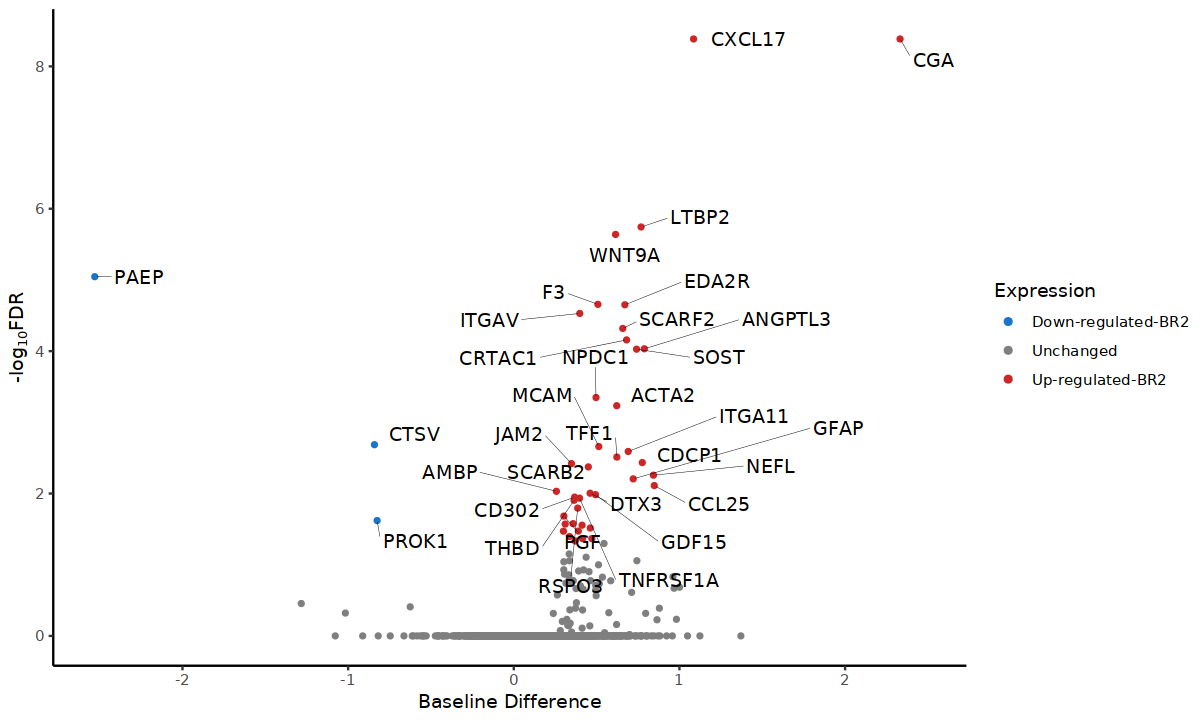

In [39]:
options(repr.plot.width = 10, repr.plot.height = 6)

ggplot(data, aes(diff, -log(padj,10))) +
  geom_point(aes(color = Expression), size = 1) +
  xlab(expression("Baseline Difference")) + 
  ylab(expression("-log"[10]*"FDR")) +
  scale_color_manual(values = c("Down-regulated-BR2"="dodgerblue3", "Unchanged"="gray50", "Up-regulated-BR2"="firebrick3")) +
  guides(colour = guide_legend(override.aes = list(size=1.5))) +
  geom_text_repel(data = top_genes,box.padding = 0.5,force= 0.5,max.overlaps=50,
    nudge_x           = 0.15,
    hjust             = 0.1,
    segment.size      = 0.1,
                   mapping = aes(diff, -log(padj,10), label = Assay),
                   size = 4)+theme_classic()
